In [ ]:
%autosave 60

In [1]:
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import stats

import math
import random
import os

import seaborn as sns
from pylab import rcParams

import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from sklearn.preprocessing import StandardScaler
#from sklearn.preprocessing import RobustScaler
#from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import IsolationForest
from sklearn.svm import OneClassSVM
from sklearn import svm
from sklearn.neighbors import LocalOutlierFactor
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix,f1_score

import keras.utils as nm
from keras.models import Model, load_model
from keras.layers import Input, Dense, BatchNormalization
from keras.callbacks import ModelCheckpoint, TensorBoard
from keras import regularizers


RANDOM_SEED =123


F:\anaconda\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
DanminiDoorbell_Bengin = pd.read_csv("netbot_Dataset/Danmini_Doorbell/bengin_traffic.csv")
print("Bengin Null : ",DanminiDoorbell_Bengin.isnull().values.any())
print("Shape Bengin :",DanminiDoorbell_Bengin.shape)

Bengin Null :  False
Shape Bengin : (40395, 115)


In [3]:
# Standard Scaling
DanminiDoorbell_Bengin = pd.DataFrame(StandardScaler().fit_transform(DanminiDoorbell_Bengin))
DanminiDoorbell_Bengin.head()
print(DanminiDoorbell_Bengin.shape)


(40395, 115)


In [3]:
# MinMax Scaling
DanminiDoorbell_Bengin = pd.DataFrame(MinMaxScaler().fit_transform(DanminiDoorbell_Bengin))
DanminiDoorbell_Bengin.head()
print(DanminiDoorbell_Bengin.shape)

(40395, 115)


In [4]:
#Mirai Attack
DanminiDoorbell_Mirai_udpplain = pd.read_csv("netbot_Dataset/Danmini_Doorbell/mirai_attacks/udpplain.csv")
DanminiDoorbell_Mirai_udp = pd.read_csv("netbot_Dataset/Danmini_Doorbell/mirai_attacks/udp.csv")
DanminiDoorbell_Mirai_syn = pd.read_csv("netbot_Dataset/Danmini_Doorbell/mirai_attacks/syn.csv")
DanminiDoorbell_Mirai_scan = pd.read_csv("netbot_Dataset/Danmini_Doorbell/mirai_attacks/scan.csv")
DanminiDoorbell_Mirai_ack = pd.read_csv("netbot_Dataset/Danmini_Doorbell/mirai_attacks/ack.csv")
#Bashlite Attack
DanminiDoorbell_Bashlite_combo = pd.read_csv("netbot_Dataset/Danmini_Doorbell/gafgyt_attacks/combo.csv")
DanminiDoorbell_Bashlite_junk = pd.read_csv("netbot_Dataset/Danmini_Doorbell/gafgyt_attacks/junk.csv")
DanminiDoorbell_Bashlite_tcp = pd.read_csv("netbot_Dataset/Danmini_Doorbell/gafgyt_attacks/tcp.csv")
DanminiDoorbell_Bashlite_scan = pd.read_csv("netbot_Dataset/Danmini_Doorbell/gafgyt_attacks/scan.csv")
DanminiDoorbell_Bashlite_udp = pd.read_csv("netbot_Dataset/Danmini_Doorbell/gafgyt_attacks/udp.csv")

In [8]:
print("DanminiDoorbell_Mirai_udpplain Null : ",DanminiDoorbell_Mirai_udpplain.isnull().values.any())
print("DanminiDoorbell_Mirai_udp Null : ",DanminiDoorbell_Mirai_udp.isnull().values.any())
print("DanminiDoorbell_Mirai_syn Null : ",DanminiDoorbell_Mirai_syn.isnull().values.any())
print("DanminiDoorbell_Mirai_scan Null : ",DanminiDoorbell_Mirai_scan.isnull().values.any())
print("DanminiDoorbell_Mirai_ack Null : ",DanminiDoorbell_Mirai_ack.isnull().values.any())
print("DanminiDoorbell_Bashlite_combo Null : ",DanminiDoorbell_Bashlite_combo.isnull().values.any())
print("DanminiDoorbell_Bashlite_junk Null : ",DanminiDoorbell_Bashlite_junk.isnull().values.any())
print("DanminiDoorbell_Bashlite_tcp Null : ",DanminiDoorbell_Bashlite_tcp.isnull().values.any())
print("DanminiDoorbell_Bashlite_scan Null : ",DanminiDoorbell_Bashlite_scan.isnull().values.any())
print("DanminiDoorbell_Bashlite_udp Null : ",DanminiDoorbell_Bashlite_udp.isnull().values.any())

DanminiDoorbell_Mirai_udpplain Null :  False
DanminiDoorbell_Mirai_udp Null :  False
DanminiDoorbell_Mirai_syn Null :  False
DanminiDoorbell_Mirai_scan Null :  False
DanminiDoorbell_Mirai_ack Null :  False
DanminiDoorbell_Bashlite_combo Null :  False
DanminiDoorbell_Bashlite_junk Null :  False
DanminiDoorbell_Bashlite_tcp Null :  False
DanminiDoorbell_Bashlite_scan Null :  False
DanminiDoorbell_Bashlite_udp Null :  False


In [5]:
# Standard Scaling Mirai Data
DanminiDoorbell_Mirai_udpplain = pd.DataFrame(StandardScaler().fit_transform(DanminiDoorbell_Mirai_udpplain))
DanminiDoorbell_Mirai_udp = pd.DataFrame(StandardScaler().fit_transform(DanminiDoorbell_Mirai_udp))
DanminiDoorbell_Mirai_syn = pd.DataFrame(StandardScaler().fit_transform(DanminiDoorbell_Mirai_syn))
DanminiDoorbell_Mirai_scan = pd.DataFrame(StandardScaler().fit_transform(DanminiDoorbell_Mirai_scan))
DanminiDoorbell_Mirai_ack = pd.DataFrame(StandardScaler().fit_transform(DanminiDoorbell_Mirai_ack))
# Standard Scaling Bashlite Data
DanminiDoorbell_Bashlite_combo = pd.DataFrame(StandardScaler().fit_transform(DanminiDoorbell_Bashlite_combo))
DanminiDoorbell_Bashlite_junk = pd.DataFrame(StandardScaler().fit_transform(DanminiDoorbell_Bashlite_junk))
DanminiDoorbell_Bashlite_tcp = pd.DataFrame(StandardScaler().fit_transform(DanminiDoorbell_Bashlite_tcp))
DanminiDoorbell_Bashlite_scan = pd.DataFrame(StandardScaler().fit_transform(DanminiDoorbell_Bashlite_scan))
DanminiDoorbell_Bashlite_udp = pd.DataFrame(StandardScaler().fit_transform(DanminiDoorbell_Bashlite_udp))

In [ ]:
# MinMaxScaling Mirai Data
DanminiDoorbell_Mirai_udpplain = pd.DataFrame(MinMaxScaler().fit_transform(DanminiDoorbell_Mirai_udpplain))
DanminiDoorbell_Mirai_udp = pd.DataFrame(MinMaxScaler().fit_transform(DanminiDoorbell_Mirai_udp))
DanminiDoorbell_Mirai_syn = pd.DataFrame(MinMaxScaler().fit_transform(DanminiDoorbell_Mirai_syn))
DanminiDoorbell_Mirai_scan = pd.DataFrame(MinMaxScaler().fit_transform(DanminiDoorbell_Mirai_scan))
DanminiDoorbell_Mirai_ack = pd.DataFrame(MinMaxScaler().fit_transform(DanminiDoorbell_Mirai_ack))
# MinMax Scaling Bashlite Data
DanminiDoorbell_Bashlite_combo = pd.DataFrame(MinMaxScaler().fit_transform(DanminiDoorbell_Bashlite_combo))
DanminiDoorbell_Bashlite_junk = pd.DataFrame(MinMaxScaler().fit_transform(DanminiDoorbell_Bashlite_junk))
DanminiDoorbell_Bashlite_tcp = pd.DataFrame(MinMaxScaler().fit_transform(DanminiDoorbell_Bashlite_tcp))
DanminiDoorbell_Bashlite_scan = pd.DataFrame(MinMaxScaler().fit_transform(DanminiDoorbell_Bashlite_scan))
DanminiDoorbell_Bashlite_udp = pd.DataFrame(MinMaxScaler().fit_transform(DanminiDoorbell_Bashlite_udp))

In [6]:
#Labeling the Dataset
DanminiDoorbell_Bengin['isBot']=0
DanminiDoorbell_Mirai_udpplain['isBot']=1
DanminiDoorbell_Mirai_udp['isBot']=1
DanminiDoorbell_Mirai_syn['isBot']=1
DanminiDoorbell_Mirai_scan['isBot']=1
DanminiDoorbell_Mirai_ack['isBot']=1
#Preparing test data for Bashlite Attack
DanminiDoorbell_Bashlite_combo['isBot']=1
DanminiDoorbell_Bashlite_junk['isBot']=1
DanminiDoorbell_Bashlite_tcp['isBot']=1
DanminiDoorbell_Bashlite_scan['isBot']=1
DanminiDoorbell_Bashlite_udp['isBot']=1

In [7]:
DanminiDoorbell_Dataset = pd.concat([
  
    DanminiDoorbell_Mirai_udpplain,
    DanminiDoorbell_Mirai_udp,
    DanminiDoorbell_Mirai_syn,
    DanminiDoorbell_Mirai_scan,
    DanminiDoorbell_Mirai_ack,
    DanminiDoorbell_Bashlite_combo,
    DanminiDoorbell_Bashlite_junk,
    DanminiDoorbell_Bashlite_tcp,
    DanminiDoorbell_Bashlite_scan,
    DanminiDoorbell_Bashlite_udp
])
DanminiDoorbell_Dataset = shuffle(DanminiDoorbell_Dataset)
print(DanminiDoorbell_Dataset.shape)
DanminiDoorbell_Dataset.head()

(968750, 116)


,0,1,2,3,4,5,6,7,8,9,...,106,107,108,109,110,111,112,113,114,isBot
7270,0.890766,-0.144143,-0.120852,0.870861,-0.223206,-0.201304,0.827900,-0.216320,-0.362993,0.719913,...,0.000000,0.000000,-0.023314,-0.024407,-0.023060,-0.024407,-0.021291,0.000000,0.000000,1
69961,-0.019367,-0.015520,-0.012333,-0.021404,-0.016442,-0.013906,-0.024950,-0.019235,-0.016802,-0.028092,...,-0.000865,-0.002560,-0.022199,-0.014151,-0.005261,-0.017054,-0.004405,-0.000066,-0.001565,1
1748,-0.014747,-0.017668,-0.014326,-0.017465,-0.018367,-0.015891,-0.024924,-0.020703,-0.019280,-0.030168,...,-0.002909,-0.001747,-0.023459,-0.017191,-0.013219,-0.019584,-0.011605,-0.007912,-0.007978,1
60351,-0.014747,-0.017668,-0.014326,-0.017465,-0.018367,-0.015891,-0.024924,-0.020703,-0.019280,-0.030168,...,-0.002909,-0.001747,-0.023459,-0.017191,-0.013219,-0.019584,-0.011605,-0.007912,-0.007978,1
124193,0.989218,-1.658817,0.397928,0.896307,-1.597779,0.847319,0.822413,-1.364066,1.207564,0.239389,...,0.000000,0.000000,-0.014861,-1.375602,-0.008998,-1.375602,-0.004081,0.000000,0.000000,1


In [9]:
#Splitting the Bengin data
DanminiDoorbell_Train,DanminiDoorbell_Bengin_Test = train_test_split(DanminiDoorbell_Bengin,test_size=0.33,random_state=RANDOM_SEED)
DanminiDoorbell_Test = pd.concat([
    DanminiDoorbell_Bengin_Test,
    DanminiDoorbell_Dataset
])
DanminiDoorbell_Test = shuffle(DanminiDoorbell_Test)

DanminiDoorbell_Test_Labels = DanminiDoorbell_Test['isBot']
DanminiDoorbell_Train = DanminiDoorbell_Train.drop(['isBot'],axis=1)
DanminiDoorbell_Test = DanminiDoorbell_Test.drop(['isBot'],axis=1)

Train = DanminiDoorbell_Train.values
Test = DanminiDoorbell_Test.values

In [10]:
print(Train.shape)
print(Test.shape)
print(DanminiDoorbell_Test_Labels.shape)

(27064, 115)
(982081, 115)
(982081,)


In [11]:
#8 fully connected layers
#4 layers for encoders and 4 layers for decoders
#additionally L1 regularization will be used during training
#Layers : 86 42 28 18 18 28 42 115 neurons
input_dim = DanminiDoorbell_Train.shape[1]
input_layer = Input(shape=(input_dim, ))

encoder = Dense(int(input_dim*0.75),activation="tanh")(input_layer)
encoder = BatchNormalization()(encoder)
encoder = Dense(int(input_dim*0.50),activation="relu")(encoder)
encoder = BatchNormalization()(encoder)
encoder = Dense(int(input_dim*0.33),activation="tanh")(encoder)
encoder = BatchNormalization()(encoder)
encoder = Dense(int(input_dim*0.25),activation="relu")(encoder)
encoder = BatchNormalization()(encoder)

decoder = Dense(int(input_dim*0.33),activation="tanh")(encoder)
decoder = BatchNormalization()(decoder)
decoder = Dense(int(input_dim*0.50),activation="relu")(decoder)
decoder = BatchNormalization()(decoder)
decoder = Dense(int(input_dim*0.75),activation="tanh")(decoder)
decoder = BatchNormalization()(decoder)
decoder = Dense(input_dim, activation="relu")(decoder)
decoder = BatchNormalization()(decoder)


autoencoder = Model(inputs=input_layer,outputs=decoder)

In [ ]:
%%timeit
#Train our model with 800 epochs with a batch size of 32 samples and
#save the best performing model to a file.


epoch = 800
batch_size = 32
from keras import optimizers
sgd = optimizers.SGD(lr=0.012)

autoencoder.compile(optimizer='sgd',
                    loss='mean_squared_error',
                    metrics=['accuracy'])
                    
checkpointer = ModelCheckpoint(filepath="Models/DanminiDoorbell_Model1.h5",
                              verbose=0,
                               monitor='loss',
                              save_best_only=True)

tensorboard = TensorBoard(log_dir='botnet_files/DanminiDoorbell_logs',
                         histogram_freq=0,
                         write_graph=True,
                         write_images=True)

history = autoencoder.fit(Train,Train,
                         epochs=epoch,
                         batch_size=batch_size,
                         shuffle=True,
                         validation_data=(Test,Test),
                         verbose=1,
                         callbacks=[checkpointer,tensorboard]).history


# EVALUATION

In [6]:
#Load Model
autoencoder = load_model("Models/DanminiDoorbell_Model.h5")

In [ ]:
plt.plot(history['loss'])
plt.plot(history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='upper right');

In [ ]:
%%timeit
predictions = autoencoder.predict(Test)

In [8]:
predictions = autoencoder.predict(Test)
labels = DanminiDoorbell_Test_Labels
print_metr(predictions,labels)

NameError: name 'Train' is not defined

In [11]:
mse = np.mean(np.power(Test - predictions, 2), axis=1)

error_df = pd.DataFrame({'reconstruction_error': mse,
                        'true_class': labels})

In [12]:
error_df.describe()

,reconstruction_error,true_class
count,982081.000000,982081.000000
mean,4.190087,0.986426
std,29.126355,0.115715
min,0.008493,0.000000
25%,0.143174,1.000000
50%,0.856821,1.000000
75%,2.687687,1.000000
max,7743.887387,1.000000


# ROC CURVE

In [8]:
from sklearn.metrics import (confusion_matrix, precision_recall_curve, auc,
                             roc_curve, recall_score, classification_report, f1_score,
                             precision_recall_fscore_support)

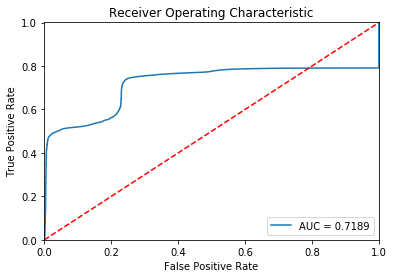

In [14]:
fpr, tpr, thresholds = roc_curve(error_df.true_class,error_df.reconstruction_error)
roc_auc = auc(fpr, tpr)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, label='AUC = %0.4f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.001, 1])
plt.ylim([0, 1.001])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show();

# Precision vs Recall

In [ ]:
precision, recall, th = precision_recall_curve(error_df.true_class, error_df.reconstruction_error)
plt.plot(recall, precision, 'b', label='Precision-Recall curve')
plt.title('Recall vs Precision')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.show()

In [ ]:
plt.plot(th, precision[1:], 'b', label='Threshold-Precision curve')
plt.title('Precision for different threshold values')
plt.xlabel('Threshold')
plt.ylabel('Precision')
plt.show()

In [ ]:
plt.plot(th, recall[1:], 'b', label='Threshold-Recall curve')
plt.title('Recall for different threshold values')
plt.xlabel('Reconstruction error')
plt.ylabel('Recall')
plt.show()

# Setting Threshold
tr = MSE_TestSet + s(MSE_TestSet )

In [15]:
treshold = np.mean(np.mean(np.power(Test,2)))+ np.sum(np.mean(np.power(Test,2)))
print(treshold)

1.7717811368069318


In [16]:
#Setting Threshold
threshold = 0.043

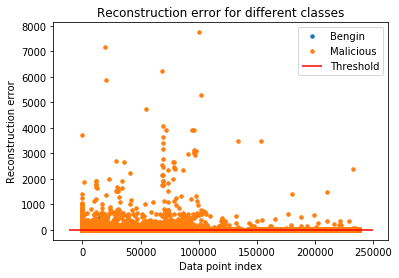

In [17]:
groups = error_df.groupby('true_class')
fig, ax = plt.subplots()

for name, group in groups:
    ax.plot(group.index, group.reconstruction_error, marker='o', ms=3.5, linestyle='',
            label= "Malicious" if name == 1 else "Bengin")
ax.hlines(threshold, ax.get_xlim()[0], ax.get_xlim()[1], colors="r", zorder=100, label='Threshold')
ax.legend()
plt.title("Reconstruction error for different classes")
plt.ylabel("Reconstruction error")
plt.xlabel("Data point index")
plt.show();

# CONFUSION MATRIX

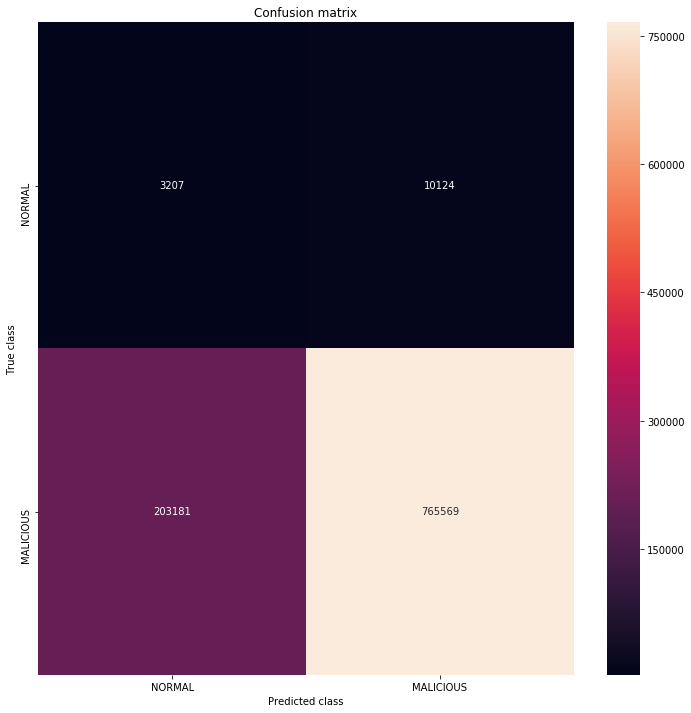

In [18]:
LABELS=['NORMAL','MALICIOUS']
y_pred = [1 if e > threshold else 0 for e in error_df.reconstruction_error.values]
conf_matrix = confusion_matrix(error_df.true_class, y_pred)

plt.figure(figsize=(12, 12))
sns.heatmap(conf_matrix, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt="d");
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

# ISOLATION FOREST

In [40]:
#DanminiDoorbell_Dataset = pd.DataFrame(DanminiDoorbell_Dataset.sample(100000))
#DanminiDoorbell_Dataset.shape

(100000, 116)

In [8]:
DanminiDoorbell_Dataset = pd.concat([
    DanminiDoorbell_Dataset,
    DanminiDoorbell_Bengin
])
DanminiDoorbell_Dataset = shuffle(DanminiDoorbell_Dataset)
print(DanminiDoorbell_Dataset.shape)
DanminiDoorbell_Dataset.head()

(1009145, 116)


,0,1,2,3,4,5,6,7,8,9,...,106,107,108,109,110,111,112,113,114,isBot
82841,-0.224211,0.048286,0.117145,-0.226882,0.638527,0.912942,-0.216515,1.463471,2.866135,-0.084242,...,0.0,0.0,-0.023314,-0.024407,-0.023060,-0.024407,-0.021291,0.0,0.0,1
43347,0.574311,-0.874240,0.949469,0.419376,-0.675923,0.878733,0.154949,-0.451614,0.567017,0.348539,...,0.0,0.0,-0.014590,-1.374313,-0.015889,-1.374313,-0.013933,0.0,0.0,1
12038,0.828222,-0.855899,0.973628,0.624090,-0.627787,0.731048,0.514575,-0.311026,0.329472,-0.431438,...,0.0,0.0,-0.016855,-1.505868,-0.005713,-1.505868,-0.005713,0.0,0.0,1
78544,0.266064,-0.603762,0.880383,-0.013498,-0.394691,0.871268,-0.288340,-0.139125,0.465497,0.108683,...,0.0,0.0,-1.009661,-1.126810,-0.974152,-1.126810,-0.826619,0.0,0.0,1
5486,0.436905,-0.144169,-0.120862,0.425425,-0.225487,-0.202225,0.425762,-0.327109,-0.426187,0.340739,...,0.0,0.0,-0.023314,-0.024407,-0.023060,-0.024407,-0.021291,0.0,0.0,1


In [10]:
#COMMON CLASSES

class ExNode:
    def __init__(self,size):
        self.size=size
        
class InNode:
    def __init__(self,left,right,splitAtt,splitVal):
        self.left=left
        self.right=right
        self.splitAtt=splitAtt
        self.splitVal=splitVal



In [11]:
#FOREST

def iForest(X,noOfTrees,sampleSize):
    forest=[]
    hlim=math.ceil(math.log(sampleSize,2))
    for i in range(noOfTrees):
        X_train=DanminiDoorbell_Dataset.sample(sampleSize)
        forest.append(iTree(X_train,0,hlim))
    return forest

In [12]:
#ISOLATION TREE

def iTree(X,currHeight,hlim):
    if currHeight>=hlim or len(X)<=1:
        return ExNode(len(X))
    else:
        Q=X.columns
        q=random.choice(Q)
        p=random.choice(X[q].unique())
        X_l=X[X[q]<p]
        X_r=X[X[q]>=p]
        return InNode(iTree(X_l,currHeight+1,hlim),iTree(X_r,currHeight+1,hlim),q,p)



In [13]:
#PATH LENGTH

def pathLength(x,Tree,currHeight):
    if isinstance(Tree,ExNode):
        return currHeight
    a=Tree.splitAtt
    if x[a]<Tree.splitVal:
        return pathLength(x,Tree.left,currHeight+1)
    else:
        return pathLength(x,Tree.right,currHeight+1)

In [14]:
y_true=DanminiDoorbell_Dataset['isBot']
DanminiDoorbell_Dataset=DanminiDoorbell_Dataset.drop('isBot',1)
DanminiDoorbell_Dataset.shape

(1009145, 115)

In [44]:
sampleSize=10000

ifor=iForest(DanminiDoorbell_Dataset.sample(100000),10,sampleSize) ##Forest of 10 trees


In [ ]:
posLenLst=[]
negLenLst=[]

for sim in range(1000):
    ind=random.choice(DanminiDoorbell_Dataset[y_true==1].index)
    for tree in ifor:
        posLenLst.append(pathLength(DanminiDoorbell_Dataset.iloc[ind],tree,0))
        
    ind=random.choice(DanminiDoorbell_Dataset[y_true==0].index)
    for tree in ifor:
        negLenLst.append(pathLength(DanminiDoorbell_Dataset.iloc[ind],tree,0))



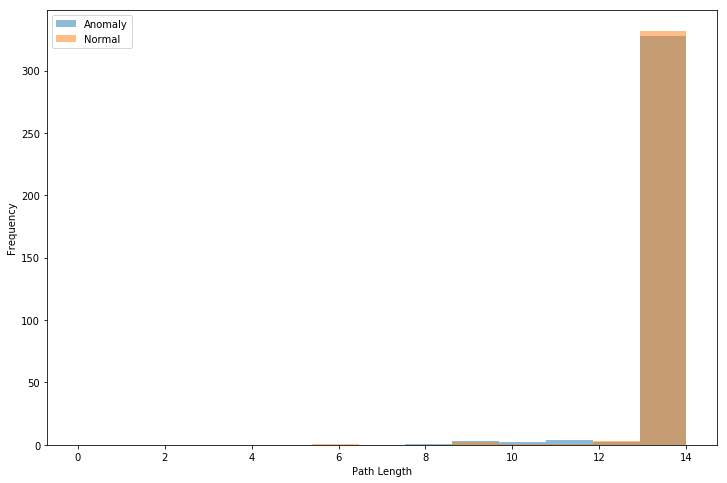

In [47]:

bins = np.linspace(0,math.ceil(math.log(sampleSize,2)), math.ceil(math.log(sampleSize,2)))

plt.figure(figsize=(12,8))
plt.hist(posLenLst, bins, alpha=0.5, label='Anomaly')
plt.hist(negLenLst, bins, alpha=0.5, label='Normal')
plt.xlabel('Path Length')
plt.ylabel('Frequency')
plt.legend(loc='upper left')

In [15]:
DanminiDoorbell_Label = y_true
X_train, X_test, y_train, y_test = train_test_split(DanminiDoorbell_Dataset,DanminiDoorbell_Label, test_size=0.33, random_state=42)

In [18]:
## Not required for Isolation Forest
def preprocess(DanminiDoorbell_Dataset):
    for col in DanminiDoorbell_Dataset:
        DanminiDoorbell_Dataset[col]=(DanminiDoorbell_Dataset[col]-np.min(DanminiDoorbell_Dataset[col]))/(np.max(DanminiDoorbell_Dataset[col])-np.min(DanminiDoorbell_Dataset[col]))
    return


#### Note: The below train and predict functions are designed to output ensemble models (bagged models), with the default size being 5 models. The Isolation Forest and One Class SVM use these functions.

In [16]:
## Not valid for LOF
def train(X,clf,ensembleSize=5,sampleSize=10000):
    mdlLst=[]
    for n in range(ensembleSize):
        X=DanminiDoorbell_Dataset.sample(sampleSize)
        clf.fit(X + np.random.normal(size=X.shape, scale=0.0001))
        mdlLst.append(clf)
    return mdlLst


In [17]:
## Not valid for LOF
def predict(X,mdlLst):
    y_pred=np.zeros(X.shape[0])
    for clf in mdlLst:
        y_pred=np.add(y_pred,clf.decision_function(X).reshape(X.shape[0],))
    y_pred=(y_pred*1.0)/len(mdlLst)
    return y_pred

In [19]:
DanminiDoorbell_Dataset.shape

(1009145, 115)

# Isolation Forest

In [19]:
alg=IsolationForest(n_estimators=100, max_samples='auto', contamination=0.00001,max_features=1.0, bootstrap=False, n_jobs=-1, random_state=42, verbose=0)

# 
Note: The magic function timeit does not let us use any variable that is created in the timeit cell. Hence, ecery cell with a timeit magic function will have a corresponding regular cell with the same code

In [20]:
%%timeit
if_mdlLst=train(X_train,alg)

14.5 s ± 169 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [21]:
if_mdlLst=train(X_train,alg)

In [22]:
%%timeit
if_y_pred=predict(X_test,if_mdlLst)
if_y_pred=1-if_y_pred

#Creating class labels based on decision function
if_y_pred_class=if_y_pred.copy()
if_y_pred_class[if_y_pred>=np.percentile(if_y_pred,95)]=1
if_y_pred_class[if_y_pred<np.percentile(if_y_pred,95)]=0

2min 34s ± 899 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [23]:
if_y_pred=predict(X_test,if_mdlLst)
print(if_y_pred)
if_y_pred=1-if_y_pred
print("1-:",if_y_pred)

#Creating class labels based on decision function
if_y_pred_class=if_y_pred.copy()
if_y_pred_class[if_y_pred>=np.percentile(if_y_pred,95)]=1
if_y_pred_class[if_y_pred<np.percentile(if_y_pred,95)]=0

[0.07456968 0.11353456 0.13718249 ... 0.14274441 0.07380567 0.04428836]
1-: [0.92543032 0.88646544 0.86281751 ... 0.85725559 0.92619433 0.95571164]


In [24]:
roc_auc_score(y_test, if_y_pred_class)

0.3952848356190205

In [25]:
f1_score(y_test, if_y_pred_class)

0.07895683934695384

In [26]:
if_cm=confusion_matrix(y_test, if_y_pred_class)

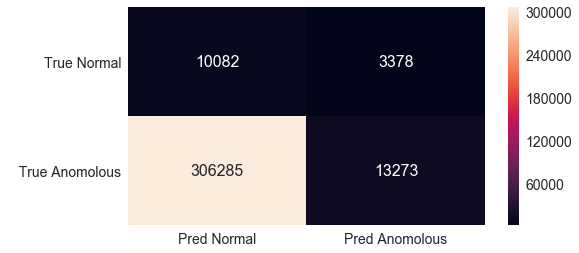

In [35]:
df_cm = pd.DataFrame(if_cm,['True Normal','   True Anomolous'],['Pred Normal','Pred Anomolous'])
plt.figure(figsize = (8,4))
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cm, annot=True,annot_kws={"size": 16},fmt='g')# font size

# kmeans

In [15]:
DanminiDoorbell_Dataset.shape

(1009145, 115)

In [16]:
# Determining optimal number of clusters
Nc = range(1, 20)
kmeans = [KMeans(n_clusters=i) for i in Nc]
kmeans

[KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
     n_clusters=1, n_init=10, n_jobs=1, precompute_distances='auto',
     random_state=None, tol=0.0001, verbose=0),
 KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
     n_clusters=2, n_init=10, n_jobs=1, precompute_distances='auto',
     random_state=None, tol=0.0001, verbose=0),
 KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
     n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
     random_state=None, tol=0.0001, verbose=0),
 KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
     n_clusters=4, n_init=10, n_jobs=1, precompute_distances='auto',
     random_state=None, tol=0.0001, verbose=0),
 KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
     n_clusters=5, n_init=10, n_jobs=1, precompute_distances='auto',
     random_state=None, tol=0.0001, verbose=0),
 KMeans(algorithm='auto', copy_x=True, init='k-means++', max

In [17]:
score = [kmeans[i].fit(DanminiDoorbell_Dataset).score(DanminiDoorbell_Dataset) for i in range(len(kmeans))]
score

[-103009674.99999997,
 -86467252.70987733,
 -77031562.41130528,
 -71779272.78272483,
 -68110274.82904045,
 -64307644.408025995,
 -61554062.89666232,
 -58973360.25030239,
 -57315209.870303325,
 -53822106.64652209,
 -52591676.18456878,
 -51020968.0329381,
 -49374987.440926276,
 -47561010.60899703,
 -46163905.19402513,
 -45688750.6469741,
 -43837009.10790093,
 -43345499.89827858,
 -42418061.85852144]

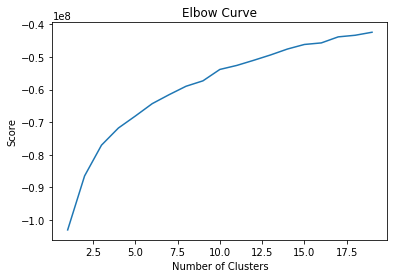

In [19]:
plt.plot(Nc,score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

In [24]:
%%timeit
kmeans = KMeans(n_clusters=2, random_state=42,n_jobs=-1).fit(X_train)

The slowest run took 5.12 times longer than the fastest. This could mean that an intermediate result is being cached.
1min 57s ± 1min 14s per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [32]:
kmeans = KMeans(n_clusters=2, random_state=42,n_jobs=-1).fit(X_train)

In [25]:
%%timeit
X_test_clusters=kmeans.predict(X_test)
X_test_clusters_centers=kmeans.cluster_centers_
dist = [np.linalg.norm(x-y) for x,y in zip(X_test.as_matrix(),X_test_clusters_centers[X_test_clusters])]

km_y_pred=np.array(dist)
km_y_pred[dist>=np.percentile(dist,95)]=1
km_y_pred[dist<np.percentile(dist,95)]=0

F:\anaconda\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  This is separate from the ipykernel package so we can avoid doing imports until


2.32 s ± 13.3 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [34]:
X_test_clusters=kmeans.predict(X_test)
X_test_clusters_centers=kmeans.cluster_centers_
dist = [np.linalg.norm(x-y) for x,y in zip(X_test.as_matrix(),X_test_clusters_centers[X_test_clusters])]
km_y_pred=np.array(dist)
km_y_pred[dist>=np.percentile(dist,95)]=1
km_y_pred[dist<np.percentile(dist,95)]=0

F:\anaconda\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  This is separate from the ipykernel package so we can avoid doing imports until


In [35]:
roc_auc_score(y_test, km_y_pred)

0.4255543450253371

In [36]:
km_cm=confusion_matrix(y_test, km_y_pred)

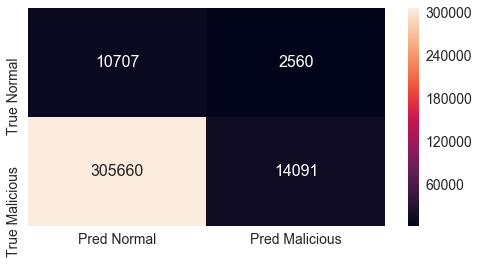

In [37]:
df_cm = pd.DataFrame(km_cm,['True Normal','True Malicious'],['Pred Normal','Pred Malicious'])
plt.figure(figsize = (8,4))
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cm, annot=True,annot_kws={"size": 16},fmt='g')# font size

# LOF

Local Outlier Factor only looks at the local neighbourhood of a data point and hence cannot make predictions on out of sample data points. Hence we work directly with X_test here.

In [17]:
clf=LocalOutlierFactor(n_neighbors=20, algorithm='auto', leaf_size=30, \
                   metric='minkowski', p=2, metric_params=None, contamination=0.1, n_jobs=-1)

In [18]:
%%timeit
clf.fit(X_test)

13min 5s ± 3.94 s per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [19]:
clf.fit(X_test)

LocalOutlierFactor(algorithm='auto', contamination=0.1, leaf_size=30,
          metric='minkowski', metric_params=None, n_jobs=-1,
          n_neighbors=20, p=2)

In [20]:
%%timeit
lof_y_pred=clf.negative_outlier_factor_

#Creating class labels based on decision function
lof_y_pred_class=lof_y_pred.copy()
lof_y_pred_class[lof_y_pred>=np.percentile(lof_y_pred,95)]=1
lof_y_pred_class[lof_y_pred<np.percentile(lof_y_pred,95)]=0

10.3 ms ± 99.3 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [21]:
lof_y_pred=clf.negative_outlier_factor_

#Creating class labels based on decision function
lof_y_pred_class=lof_y_pred.copy()
lof_y_pred_class[lof_y_pred>=np.percentile(lof_y_pred,95)]=1
lof_y_pred_class[lof_y_pred<np.percentile(lof_y_pred,95)]=0

In [22]:
roc_auc_score(y_test, lof_y_pred_class)

0.5011382234376031

In [23]:
lof_cm=confusion_matrix(y_test, lof_y_pred_class)

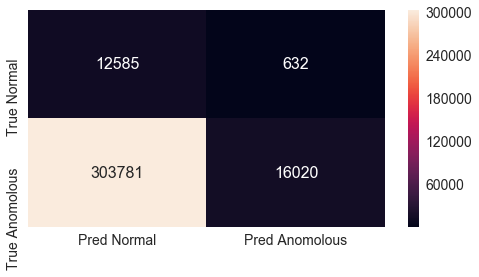

In [24]:
df_cm = pd.DataFrame(lof_cm,['True Normal','True Anomolous'],['Pred Normal','Pred Anomolous'])
plt.figure(figsize = (8,4))
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cm, annot=True,annot_kws={"size": 16},fmt='g')# font size

# ONE-CLASS SVM

In [20]:
alg=OneClassSVM(kernel='linear',gamma='auto', coef0=0.0, tol=0.001, nu=0.5, \
                shrinking=True, cache_size=200, verbose=False, max_iter=-1, random_state=42)

In [21]:
osvm_mdlLst = train(X_train,alg)

In [28]:
#save model
filename = 'svm_model.sav'
pickle.dump(osvm_mdlLst, open(filename, 'wb'))

In [35]:
# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.
print(result)

[OneClassSVM(cache_size=200, coef0=0.0, degree=3, gamma='auto',
      kernel='linear', max_iter=-1, nu=0.5, random_state=42,
      shrinking=True, tol=0.001, verbose=False), OneClassSVM(cache_size=200, coef0=0.0, degree=3, gamma='auto',
      kernel='linear', max_iter=-1, nu=0.5, random_state=42,
      shrinking=True, tol=0.001, verbose=False), OneClassSVM(cache_size=200, coef0=0.0, degree=3, gamma='auto',
      kernel='linear', max_iter=-1, nu=0.5, random_state=42,
      shrinking=True, tol=0.001, verbose=False), OneClassSVM(cache_size=200, coef0=0.0, degree=3, gamma='auto',
      kernel='linear', max_iter=-1, nu=0.5, random_state=42,
      shrinking=True, tol=0.001, verbose=False), OneClassSVM(cache_size=200, coef0=0.0, degree=3, gamma='auto',
      kernel='linear', max_iter=-1, nu=0.5, random_state=42,
      shrinking=True, tol=0.001, verbose=False)]


In [ ]:
%%timeit
osvm_mdlLst = train(X_train,alg)

In [ ]:
%%timeit
osvm_y_pred=predict(X_test,osvm_mdlLst)

#Creating class labels based on decision function
osvm_y_pred_class=osvm_y_pred.copy()
osvm_y_pred_class[osvm_y_pred<0]=1
osvm_y_pred_class[osvm_y_pred>=0]=0

In [ ]:
osvm_y_pred=predict(X_test,osvm_mdlLst)

#Creating class labels based on decision function
osvm_y_pred_class=osvm_y_pred.copy()
osvm_y_pred_class[osvm_y_pred<0]=1
osvm_y_pred_class[osvm_y_pred>=0]=0

In [ ]:
roc_auc_score(y_test, osvm_y_pred_class)

In [ ]:
roc_auc_score(y_test, osvm_y_pred_class)

In [ ]:
f1_score(y_test, osvm_y_pred_class)

In [ ]:
f1_score(y_test, osvm_y_pred_class)

In [ ]:
osvm_cm=confusion_matrix(y_test, osvm_y_pred_class)

In [ ]:
f_cm = pd.DataFrame(osvm_cm,
                  ['True Normal','True Anomolous'],['Pred Normal','Pred Anomolous'])
plt.figure(figsize = (8,4))
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cm, annot=True,annot_kws={"size": 16},fmt='g')# font size

# CONCLUSION

In [2]:
## Performance Plot
train_times={
    'Auto Encoders': 20,
    'Isolation Forest': 10.5,
    'KMeans':61,
    'LOF':8.8,
    'OneClass SVM': 27.5
}

prediction_times={
    'Auto Encoders': 5
    'Isolation Forest':24.3,
    'KMeans':0.934,
    'LOF':0.0088,
    'OneClass SVM': 69
}

Text(0.5,0,'Time in seconds')

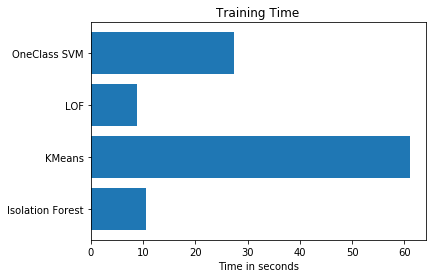

In [3]:
plt.title('Training Time')
plt.barh(range(len(train_times)), list(train_times.values()), align='center')
plt.yticks(range(len(train_times)), list(train_times.keys()))
plt.xlabel('Time in seconds')

Text(0.5,0,'Time in seconds')

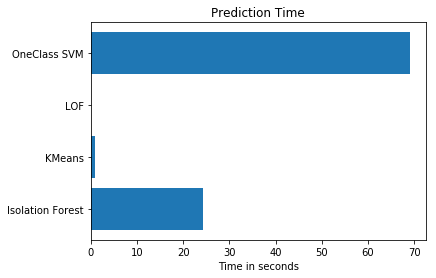

In [4]:
#Prediction Time
plt.title('Prediction Time')
plt.barh(range(len(prediction_times)), list(prediction_times.values()), align='center')
plt.yticks(range(len(prediction_times)), list(prediction_times.keys()))
plt.xlabel('Time in seconds')

### AUC ANF F1 SCORE COMPARISON

In [5]:
auc_scores={
    'Auto Encoders': 
    'Isolation Forest': roc_auc_score(y_test, if_y_pred_class),
    'KMeans':roc_auc_score(y_test, km_y_pred),
    'LOF':roc_auc_score(y_test, lof_y_pred_class),
    'OneClass SVM': roc_auc_score(y_test, osvm_y_pred_class)
}

f1_scores={
    'Isolation Forest':f1_score(y_test, if_y_pred_class),
    'KMeans':f1_score(y_test, km_y_pred),
    'LOF':f1_score(y_test, lof_y_pred_class),
    'OneClass SVM': f1_score(y_test, osvm_y_pred_class)
}

NameError: name 'y_test' is not defined

In [ ]:
plt.title('AUC Scores')
plt.barh(range(len(auc_scores)), list(auc_scores.values()), align='center')
plt.yticks(range(len(auc_scores)), list(auc_scores.keys()))
plt.xlabel('AUC Score')

In [ ]:
plt.title('F1 Scores')
plt.barh(range(len(f1_scores)), list(f1_scores.values()), align='center')
plt.yticks(range(len(f1_scores)), list(f1_scores.keys()))
plt.xlabel('F1 Score')